# Hypothesis Testing - Insurance Data (Core)
- Steven Phillips
- January 12, 2023

## Using the US Health Insurance Data and Hypthosesis Testing answer the following:
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question:

- 1. State your Null Hypothesis and Alternative Hypothesis
- 2. Select the correct test according to the data type and number of samples
- 3. Test the assumptions of your selected test.
- 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
- 5. Interpret your p-value and reject or fail to reject your null hypothesis 
- 6. Show a supporting visualization that helps display the result

### Imports and load in the data set

- US Health Insurance Dataset from Kaggle [https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset]

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# load the data set into a data frame
df = pd.read_csv('/Users/steve/Documents/GitHub/Hypothesis-Testing-Insurance-Data/Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1. Do smokers have higher insurance charges than non-smokers?

- This is numeric data, charges, of two groups, smokers and non-smokers. [2-sample t-test independent between groups]

#### 1. State the Null Hypothesis and Alternative Hypothesis

**The null hypothesis is that insurance charges are the same for smokers and non-smokers.**

**The alternative hypothesis is that smokers have higher insurance charges than non-smokers.**



#### 2. Select the correct test according to the data type and number of samples

The correct test is a 2-sample t-test independent between groups, and it will be one-tailed.  This test will be run at an alpha level of 0.05.

##### Prepare to check the assumptions and run the test

In [3]:
# see how many smokers and non-smokers in the data
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
# Filtering out smokers and non-smokers
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()

In [5]:
# define the feature of interest - charges

smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

In [6]:
smoker_charges.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [7]:
non_smoker_charges.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

#### 3. Test the assumptions of the selected test.
- No significant outliers
- Normality
- Equal Variance

##### Test for outliers:

In [8]:
# Check for outliers in charges for smokers group
zscores_smokers= stats.zscore(smoker_charges)
outliers = abs(zscores_smokers)>3
np.sum(outliers)

0

In [9]:
# check for outliers in charges for non-smoker group
zscores_nonsmokers= stats.zscore(non_smoker_charges)
outliers = abs(zscores_nonsmokers)>3
np.sum(outliers)

24

Remove outliers from the non-smokers group.

In [10]:
# remove outliers from strength group
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

24 non-smoker charges outliers with z-scores 3 or more removed.

##### Tests for normality:

In [11]:
# test the smoker group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [12]:
# test the non-smoker group for normality
result_nonsmoker_charges = stats.normaltest(non_smoker_charges)
result_nonsmoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Both Normal Tests resulted in a p-value much smaller than an alpha level of 0.05 which means our data is NOT normally distributed. However, are groups are large enough to continue with the t-test.  Sample sizes of 15 per group are sufficient for a t-test.

##### Test for Equal Variance

In [13]:
# Levene test for equal variance

result_levene = stats.levene(smoker_charges, non_smoker_charges)
result_levene

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

The Levene Equal Variance test is **not** passed and the parameter (equal_var = False) will be included in our t-test.

#### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

Equal Variance Assumption not met and a one-tailed, (equal_var = False)  t-test will be run at the alpha level of 0.05.

In [14]:
## t-test
result_Q1 = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False, alternative = 'greater')
result_Q1

Ttest_indResult(statistic=33.732305987092516, pvalue=1.2876613312937155e-104)

In [15]:
## check if our result is significant
print(f"p-value={result_Q1.pvalue:.10f}")
print(f"Significant: {result_Q1.pvalue <.05}")

p-value=0.0000000000
Significant: True


The test statistic is 33.73, and the p-value is less than 0.0001.

#### 5. Interpret your p-value and reject or fail to reject your null hypothesis

The p-value is extremely small, much less than the alpha of 0.05, and the null hypothesis is rejected. The conclusion is that, with a statistically significant result, the charges of smokers are more than the charges of non-smokers.

#### 6. Show a supporting visualization that helps display the result:

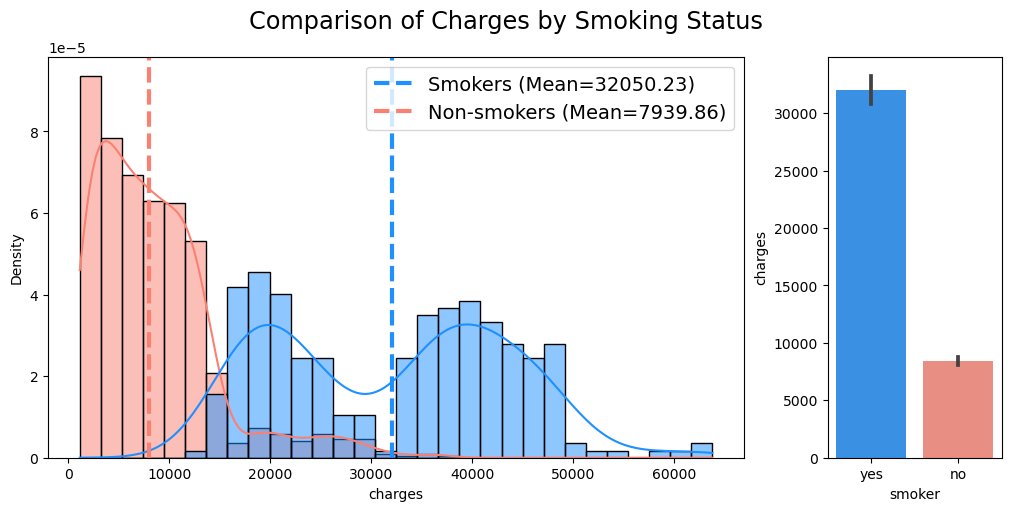

In [16]:
smoker_palette={'yes':'dodgerblue', 'no':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-smokers (Mean={np.mean(non_smoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoking Status',fontsize='xx-large');

### Q2. Are men more likely to smoke than women?

- This is categorical data, whether or not a person smokes, of two groups, men and women. [2-sample Chi-Square test]

#### 1. State the Null Hypothesis and Alternative Hypothesis

**The null hypothesis is that the likelihood of men and women smoking is the same.**

**The alternative hypothesis is that men are more likely to smoke than women.**

#### 2. Select the correct test according to the data type and number of samples

This is a comparison of two groups and the correct test is a 2-sample Chi-Square test.  This test will be run at an alpha level of 0.05.

#### 3. Test the assumptions of your selected test.

- There are two categorical variables (ordinal or nominal)
The two categorical variables are 'sex' and 'smoker'.

- The outcomes are independent
We will work under the assumption that one person's smoking status is independent of another from the data.
- **Both assumptions are met.**

#### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [17]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [18]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
#this labels the results
chi2, p, deg_free, expected_vals = result

#### 5. Interpret your p-value and reject or fail to reject your null hypothesis

In [19]:
print(p)
p<.05

0.006548143503580696


True

The p-value of 0.0065 is less than 0.05.  This means that we reject the null hypothesis and accept the alternate hypothesis and conclude that a person is more likely to smoke if they are a man than a woman.


#### 6. Show a supporting visualization that helps display the result

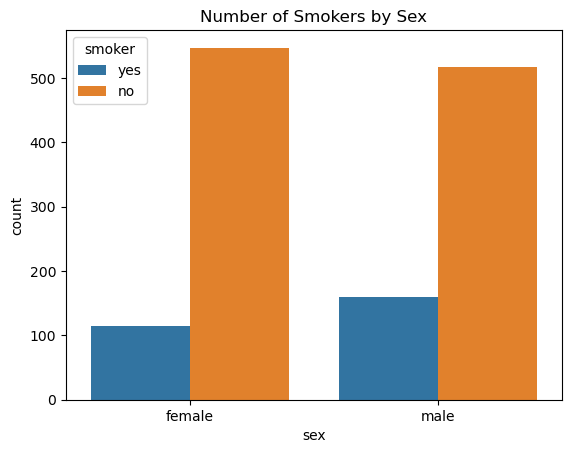

In [20]:
# side-by-side barplot comparing smoker status counts across sex

ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

### Q3. Do different regions have different charges, on average?

- This is numerical data, charges, of more than two groups, the regions. [ONE-way ANOVA test]

#### 1. State the Null Hypothesis and Alternative Hypothesis

**The null hypothesis is that different regions all have the same charges on average.**

**The alternative hypothesis is that there is a statistical difference in charges between different regions, on average.**

#### 2. Select the correct test according to the data type and number of samples

This is a comparison of multiple groups over one variable, charges, and the correct test is a ONE-way ANOVA test.

#### 3. Test the assumptions of your selected test.

- Normality
- Equal variance
- No significant outliers

In [21]:
## Create groups dictionary. There are 4 groups.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data_regions = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data_regions
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

##### Check the normality assumption

In [22]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [23]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


We have 4 groups and may ignore the normality assumption with each group at least of size 15.

##### Check the Equal Variance Assumption

In [24]:
# with the * operator for the Levene Test
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

This Levene Test p-value of 0.00086 is much smaller than 0.05, and the Equal Variance assumption is not met.  **We will run the nonparametric test instead, in this case it is the Kruskal-Wallis Test.**

#### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

Because the Equal Variance Assumption was not met the non-parametric Kruskal-Wallis Test will be run instead of the One-Way ANOVA test.

In [25]:
# run the Kruskal-Wallis test
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

#### 5. Interpret your p-value and reject or fail to reject your null hypothesis

With a p-value of 0.19 that is not less than alpha level 0.05 **we fail to reject the null hypothesis.** We fail to reject that the charges are the same across regions. We lack statistically significant evidence that there is a difference in charges across regions.

#### 6. Show a supporting visualization that helps display the result

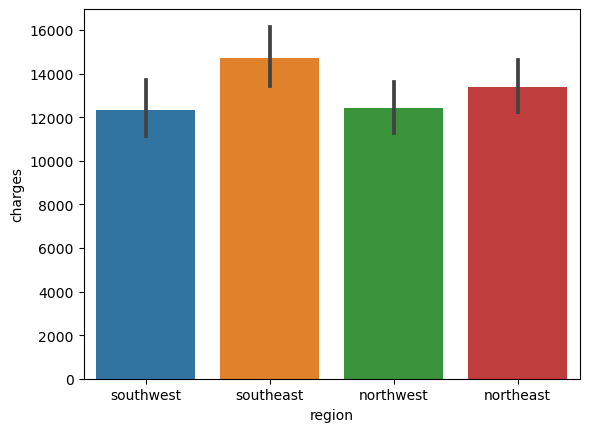

In [26]:
# barplot of average charges across regions

sns.barplot(data=df, x='region',y='charges');